In [1]:
import pandas as pd
import numpy as np

import pycountry
# visualisation
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy.stats import norm
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool,Select



from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# stats
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Check for missing data and calculate the percentage
total = df.isnull().sum().sort_values(ascending = False)  # Count of missing values per column
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending = False)  # Percentage of missing values

# Combine both total and percentage into one table
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

# Print the result
print(missing_data)



         Time  V16  Amount  V28  V27  V26  V25  V24  V23  V22  ...  V10   V9  \
Total     0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
Percent   0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          V8   V7   V6   V5   V4   V3   V2  Class  
Total    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
Percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  

[2 rows x 31 columns]


Class Distribution:
0    284315
1       492
Name: Class, dtype: int64


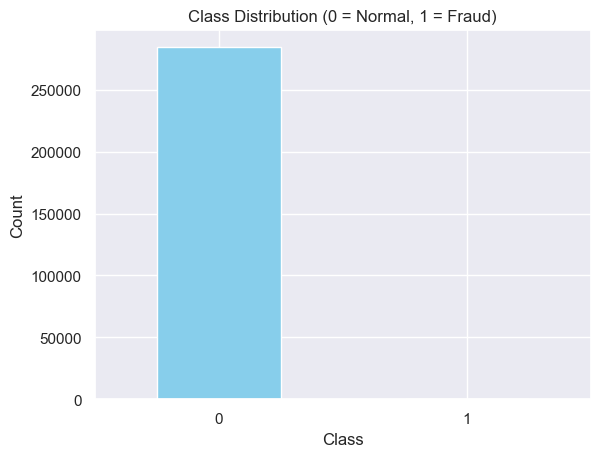

In [7]:
# Check the class distribution in the target variable (Class)
class_distribution = df['Class'].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Plot the distribution
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [8]:
# Convert 'Time' column to hours since the start of the dataset
df['Hour'] = (df['Time'] / 3600).astype(int)  # Convert to hours
df['Day'] = (df['Time'] / (3600 * 24)).astype(int)  # Convert to days

# Preview the data with Hour and Day columns added
print(df[['Time', 'Hour', 'Day']].head())


   Time  Hour  Day
0   0.0     0    0
1   0.0     0    0
2   1.0     0    0
3   1.0     0    0
4   2.0     0    0


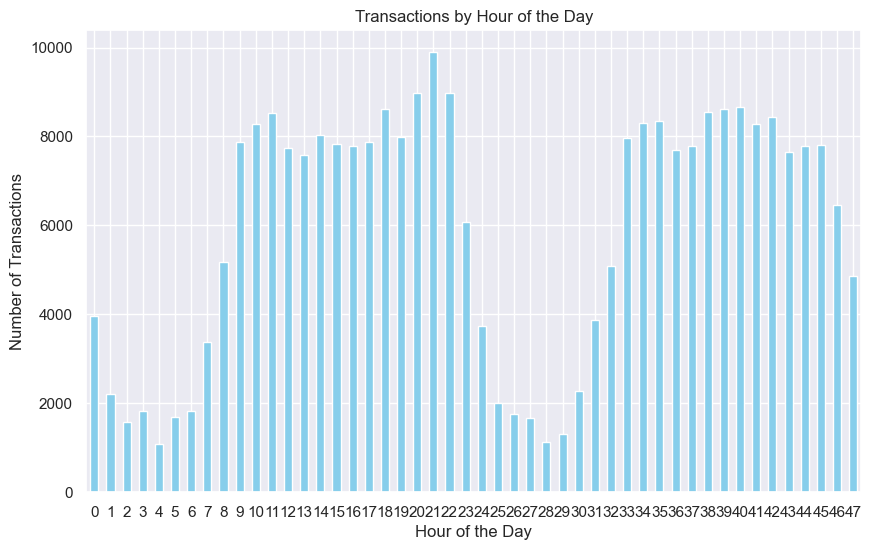

In [9]:
# Plot number of transactions per hour
import matplotlib.pyplot as plt

# Group by hour and count the number of transactions
hourly_transactions = df.groupby('Hour').size()

# Plot the hourly transaction distribution
plt.figure(figsize=(10, 6))
hourly_transactions.plot(kind='bar', color='skyblue')
plt.title("Transactions by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()


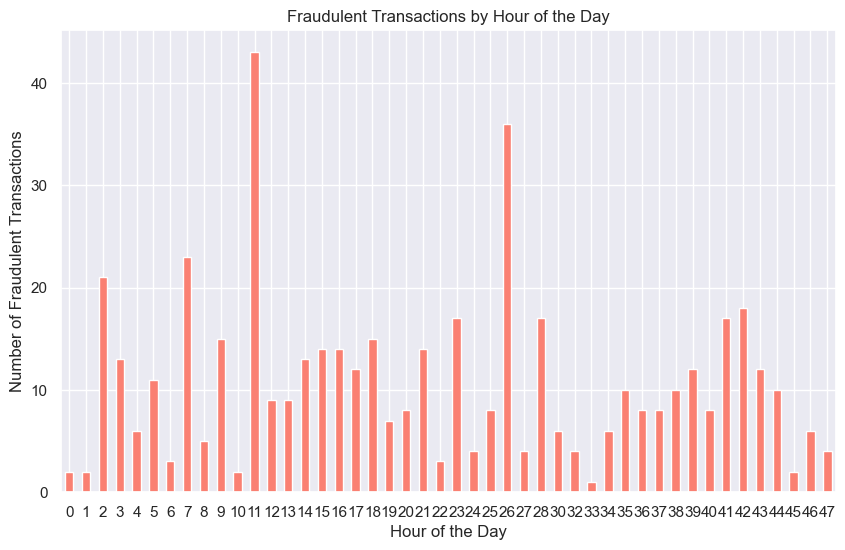

In [10]:
# Filter only fraudulent transactions (Class = 1)
fraudulent_transactions = df[df['Class'] == 1]

# Group by hour and count the number of fraudulent transactions
hourly_fraud_transactions = fraudulent_transactions.groupby('Hour').size()

# Plot the fraudulent transactions by hour of the day
plt.figure(figsize=(10, 6))
hourly_fraud_transactions.plot(kind='bar', color='salmon')
plt.title("Fraudulent Transactions by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Fraudulent Transactions")
plt.xticks(rotation=0)
plt.show()


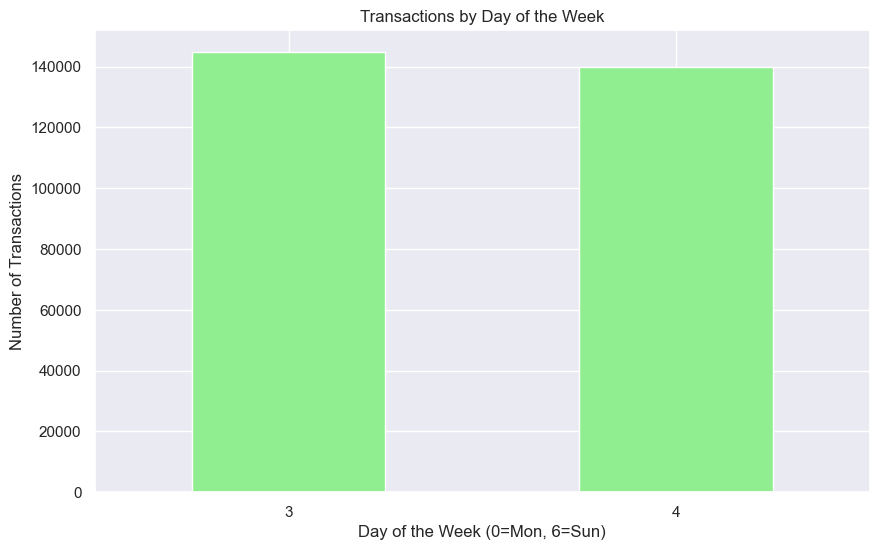

In [11]:
# Convert 'Day' to weekday (0 = Monday, 6 = Sunday)
df['Weekday'] = pd.to_datetime(df['Day'], origin='unix', unit='D').dt.weekday

# Group by weekday and count the number of transactions
weekday_transactions = df.groupby('Weekday').size()

# Plot the weekday transaction distribution
plt.figure(figsize=(10, 6))
weekday_transactions.plot(kind='bar', color='lightgreen')
plt.title("Transactions by Day of the Week")
plt.xlabel("Day of the Week (0=Mon, 6=Sun)")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()


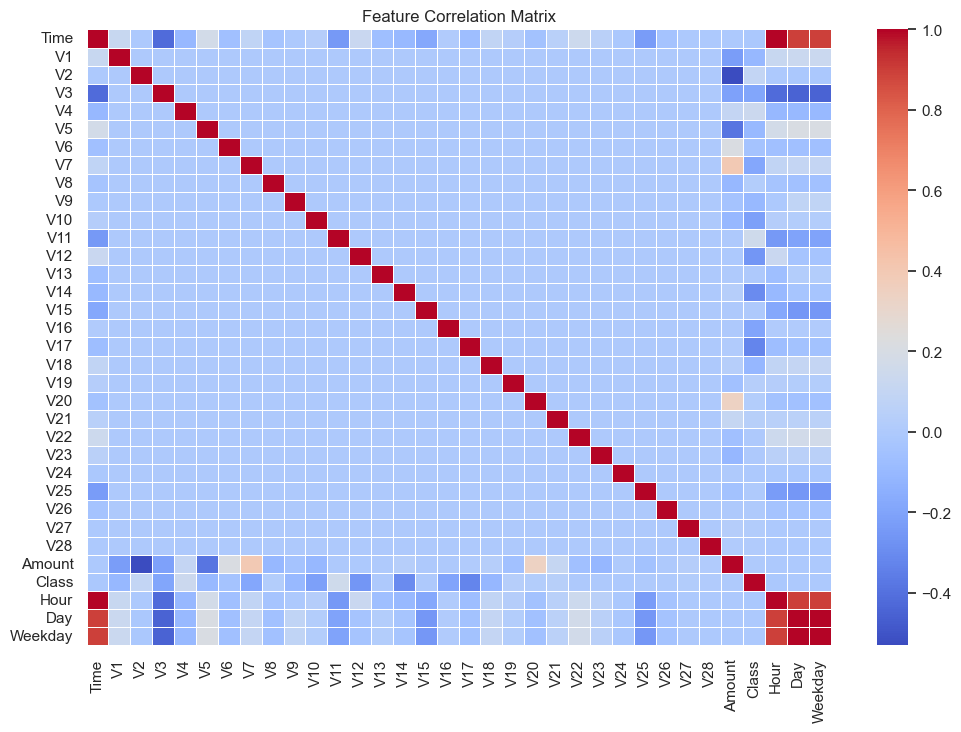

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [14]:
# Get correlations with the target variable 'Class'
correlation_with_fraud = correlation_matrix['Class'].sort_values(ascending=False)

# Display the top correlated features
print("Top features correlated with fraud:")
print(correlation_with_fraud.head(10))  # Show top 10 features most correlated with fraud


Top features correlated with fraud:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


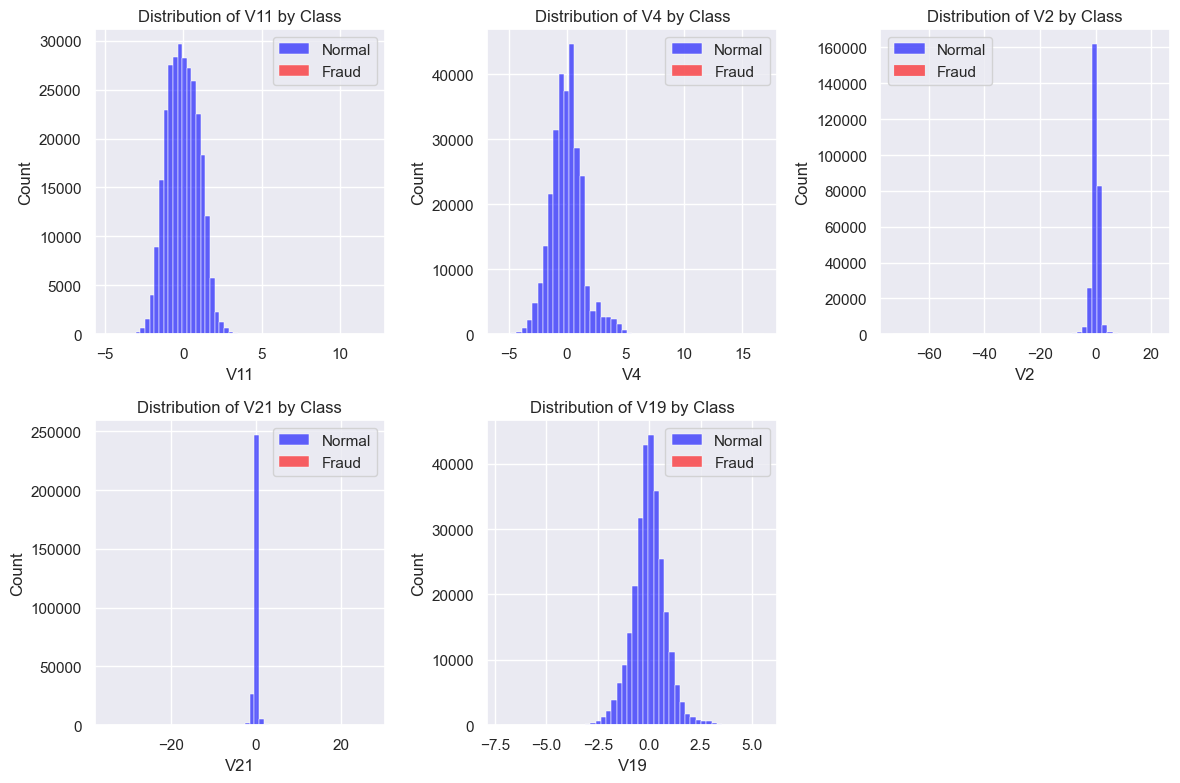

In [15]:
# Select the top 5 correlated features with fraud (excluding 'Class' itself)
top_features = correlation_with_fraud.index[1:6]

# Plot histograms for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[df['Class'] == 0][feature], bins=50, color='blue', label="Normal", alpha=0.6)
    sns.histplot(df[df['Class'] == 1][feature], bins=50, color='red', label="Fraud", alpha=0.6)
    plt.title(f"Distribution of {feature} by Class")
    plt.legend()
plt.tight_layout()
plt.show()


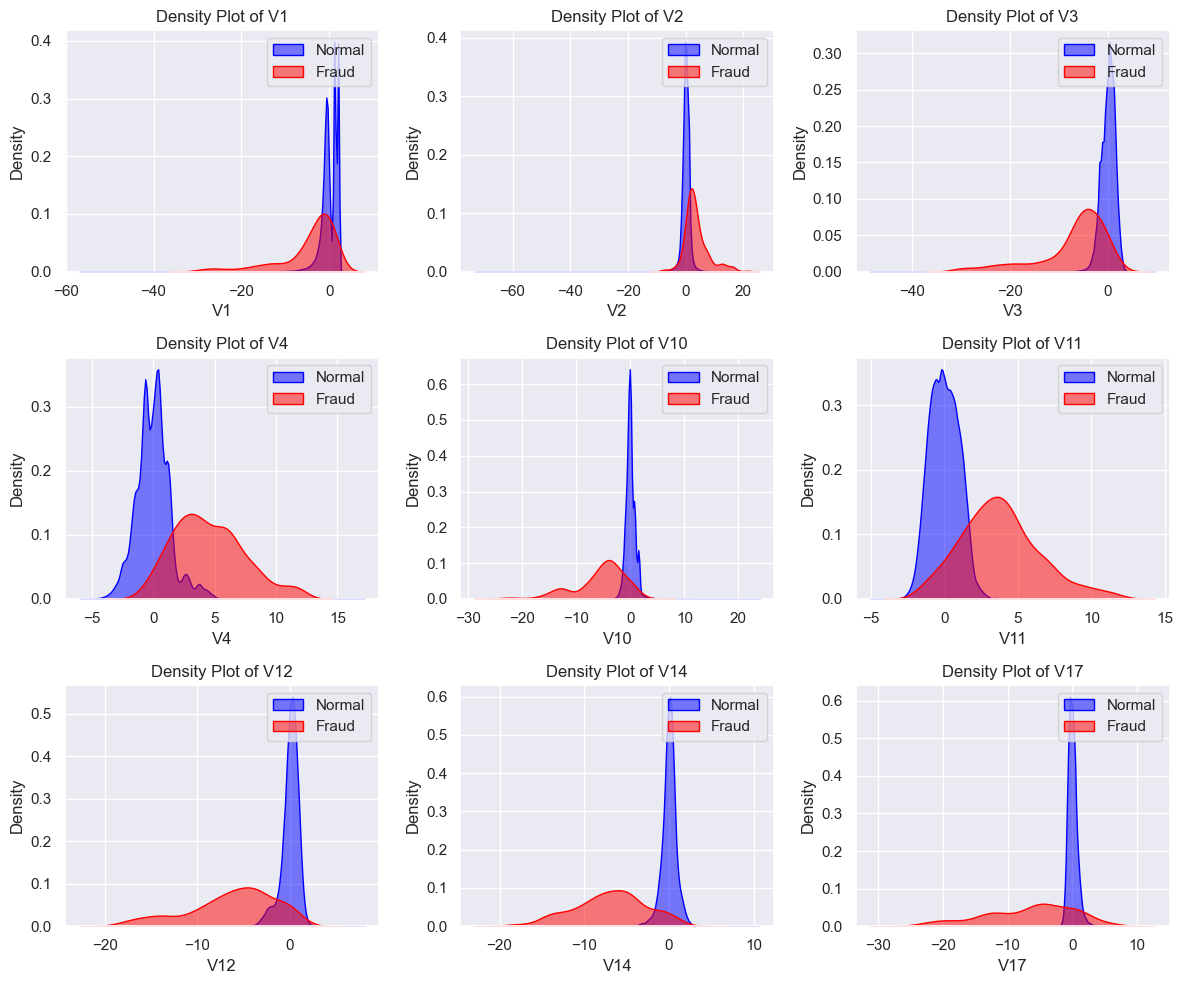

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few key features to visualize
selected_features = ['V1', 'V2', 'V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V17']  # Modify as needed

# Plot density plots
plt.figure(figsize=(12, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(df[df['Class'] == 0][feature], label="Normal", fill=True, color='blue', alpha=0.5)
    sns.kdeplot(df[df['Class'] == 1][feature], label="Fraud", fill=True, color='red', alpha=0.5)
    plt.title(f"Density Plot of {feature}")
    plt.xlabel(feature)
    plt.legend()
plt.tight_layout()
plt.show()


In [17]:
from scipy.stats import ks_2samp

# Compute KS statistic for each feature
ks_results = {feature: ks_2samp(df[df['Class'] == 0][feature], df[df['Class'] == 1][feature]).statistic for feature in df.columns if feature not in ['Time', 'Class']}

# Sort features by highest KS statistic
sorted_ks = sorted(ks_results.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 features with the highest separation between classes
print("Top features with highest separation (based on KS statistic):")
for feature, ks_value in sorted_ks[:10]:
    print(f"{feature}: {ks_value:.4f}")


Top features with highest separation (based on KS statistic):
V14: 0.8428
V10: 0.8043
V12: 0.7839
V4: 0.7664
V11: 0.7561
V17: 0.7452
V3: 0.7037
V16: 0.6865
V7: 0.6606
V2: 0.6332


In [18]:
# Define the target variable (y) and features (X)
X = df.drop(['Class', 'Time'], axis=1)  # Remove 'Class' and 'Time' from features
y = df['Class']  # Target variable (fraud or not)

# Print the shape of X and y
print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)


Shape of Features (X): (284807, 32)
Shape of Target (y): (284807,)


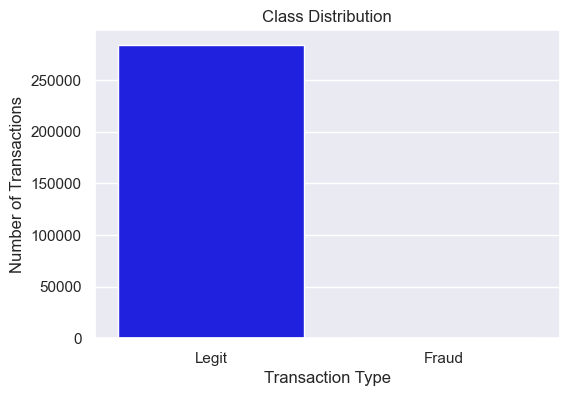

Percentage of Fraud Cases: 0.1727%


In [19]:
# Count occurrences of each class
fraud_count = df['Class'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_count.index, y=fraud_count.values, palette=['blue', 'red'])
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.title("Class Distribution")
plt.ylabel("Number of Transactions")
plt.xlabel("Transaction Type")
plt.show()

# Print percentage of fraud cases
fraud_percentage = (fraud_count[1] / fraud_count.sum()) * 100
print(f"Percentage of Fraud Cases: {fraud_percentage:.4f}%")


In [20]:
from sklearn.model_selection import train_test_split

# First, split into training (70%) and temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then, split temporary set into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print the shapes of the resulting sets
print(f"Training Set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation Set: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Test Set: X_test={X_test.shape}, y_test={y_test.shape}")


Training Set: X_train=(199364, 32), y_train=(199364,)
Validation Set: X_val=(42721, 32), y_val=(42721,)
Test Set: X_test=(42722, 32), y_test=(42722,)


In [21]:
def print_class_distribution(y_train, y_val, y_test):
    print("Class Distribution:")
    print(f"Training Set - Legit: {sum(y_train == 0)}, Fraud: {sum(y_train == 1)}")
    print(f"Validation Set - Legit: {sum(y_val == 0)}, Fraud: {sum(y_val == 1)}")
    print(f"Test Set - Legit: {sum(y_test == 0)}, Fraud: {sum(y_test == 1)}")

# Print the class distribution
print_class_distribution(y_train, y_val, y_test)


Class Distribution:
Training Set - Legit: 199020, Fraud: 344
Validation Set - Legit: 42647, Fraud: 74
Test Set - Legit: 42648, Fraud: 74


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model with initial parameters
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    max_depth=None,        # No maximum depth (fully grown trees)
    min_samples_split=2,   # Minimum samples required to split an internal node
    min_samples_leaf=1,    # Minimum number of samples in a leaf node
    max_features='sqrt',   # Number of features to consider for best split
    random_state=42,       # Ensures reproducibility
    n_jobs=-1              # Use all available CPU cores for training
)

# Print the model parameters
print(rf_model)


RandomForestClassifier(n_jobs=-1, random_state=42)


In [23]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Print confirmation
print("RandomForestClassifier training complete!")


RandomForestClassifier training complete!


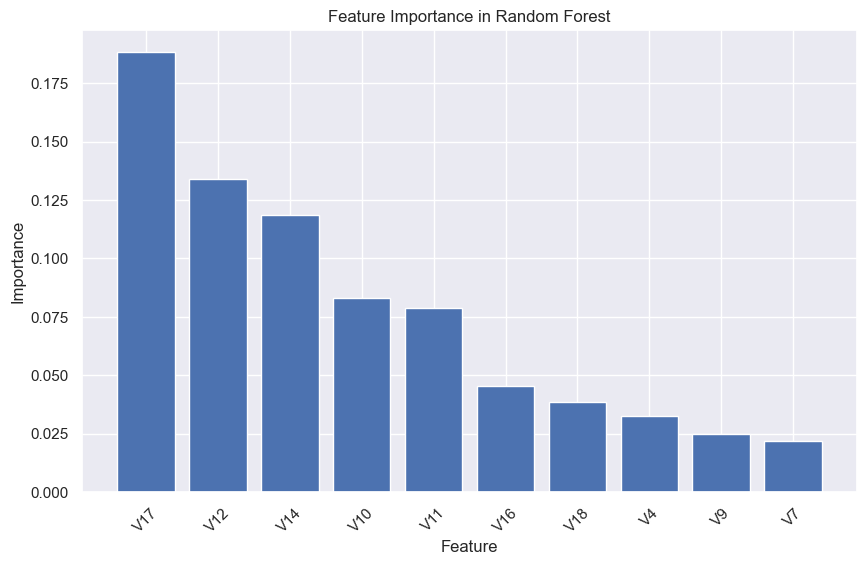

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importances = rf_model.feature_importances_

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(10), feature_importances[sorted_indices[:10]], align="center")
plt.xticks(range(10), X_train.columns[sorted_indices[:10]], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Get feature importance from the trained model
feature_importances = rf_model.feature_importances_

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({
    'Feature': X_train.columns[sorted_indices],
    'Importance': feature_importances[sorted_indices]
})

# Display the top 10 most important features
print(feature_df.head(10))


  Feature  Importance
0     V17    0.188286
1     V12    0.133897
2     V14    0.118769
3     V10    0.083181
4     V11    0.078616
5     V16    0.045203
6     V18    0.038550
7      V4    0.032429
8      V9    0.025038
9      V7    0.022071


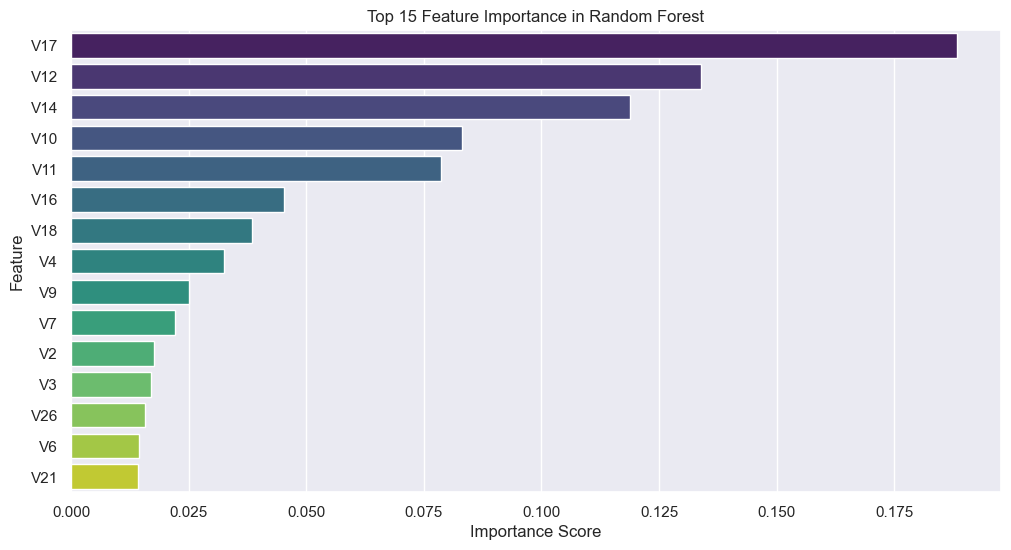

In [26]:
# Plot the top 15 important features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_df['Importance'][:15], y=feature_df['Feature'][:15], palette="viridis")
plt.title("Top 15 Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[42645     2]
 [   20    54]]


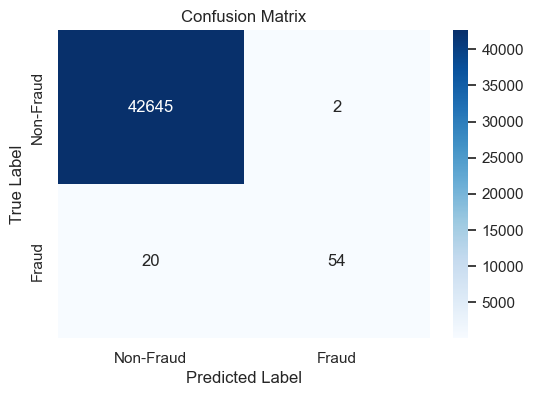

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [29]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get the predicted probabilities for the positive class (fraud)
y_val_probs = rf_model.predict_proba(X_val)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y_val, y_val_probs)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_probs)


AUC-ROC Score: 0.9238


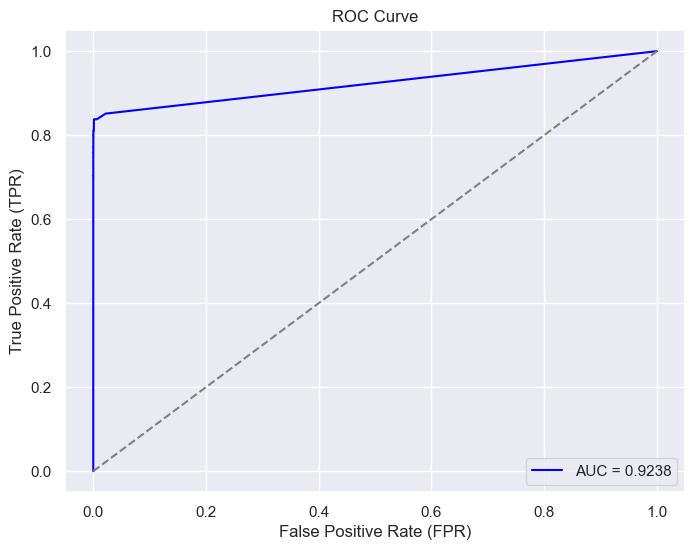

In [30]:
import matplotlib.pyplot as plt

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [31]:
from sklearn.ensemble import AdaBoostClassifier

# Define the AdaBoost model
ab_model = AdaBoostClassifier(
    n_estimators=100,    # Number of weak learners (decision trees)
    learning_rate=0.5,   # Controls the contribution of each weak learner
    random_state=42
)

# Print model details
print(ab_model)


AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42)


In [32]:
# Train the AdaBoost model on the training data
ab_model.fit(X_train, y_train)

# Print confirmation
print("AdaBoostClassifier training complete!")


AdaBoostClassifier training complete!


In [33]:
# Make predictions on the validation set
y_val_pred_ab = ab_model.predict(X_val)


In [34]:
# Predict the target values (fraudulent or non-fraudulent) using AdaBoost model
y_val_pred_ab = ab_model.predict(X_val)

# Print the first 10 predictions
print("First 10 predictions:", y_val_pred_ab[:10])


First 10 predictions: [0 0 0 0 0 0 0 0 0 0]


In [35]:
# Get the feature importance from AdaBoost model (from the base estimator, which is a decision tree)
feature_importances_ab = ab_model.feature_importances_

# Create a DataFrame for better visualization
feature_df_ab = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_ab
})

# Sort the features by importance
feature_df_ab_sorted = feature_df_ab.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_df_ab_sorted.head(10))


   Feature  Importance
3       V4        0.10
13     V14        0.08
2       V3        0.06
23     V24        0.06
28  Amount        0.05
17     V18        0.05
26     V27        0.05
11     V12        0.04
25     V26        0.04
9      V10        0.03


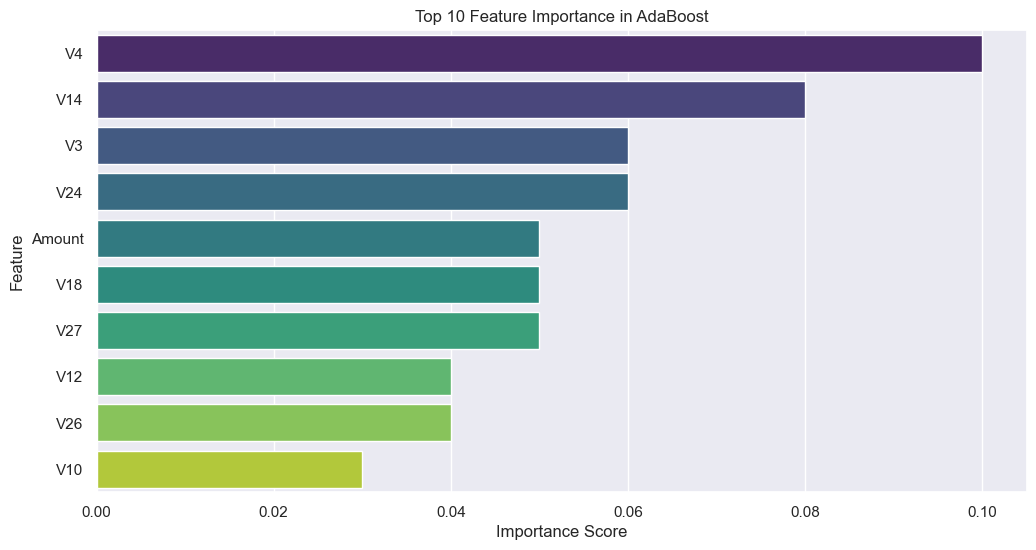

In [36]:
# Plot the top 10 important features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_df_ab_sorted['Importance'][:10], y=feature_df_ab_sorted['Feature'][:10], palette="viridis")
plt.title("Top 10 Feature Importance in AdaBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [37]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix_ab = confusion_matrix(y_val, y_val_pred_ab)

# Print the confusion matrix
print("Confusion Matrix (AdaBoost):\n", conf_matrix_ab)


Confusion Matrix (AdaBoost):
 [[42629    18]
 [   22    52]]


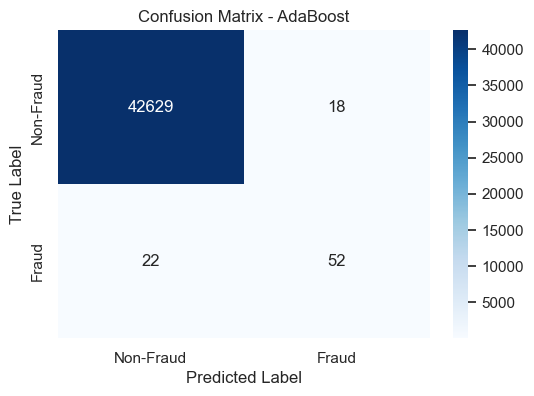

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for AdaBoost
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ab, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get the predicted probabilities for the positive class (fraudulent transactions)
y_val_probs_ab = ab_model.predict_proba(X_val)[:, 1]

# Compute AUC-ROC score
auc_score_ab = roc_auc_score(y_val, y_val_probs_ab)
print(f"AUC-ROC Score (AdaBoost): {auc_score_ab:.4f}")

# Compute the ROC curve
fpr_ab, tpr_ab, _ = roc_curve(y_val, y_val_probs_ab)


AUC-ROC Score (AdaBoost): 0.9795


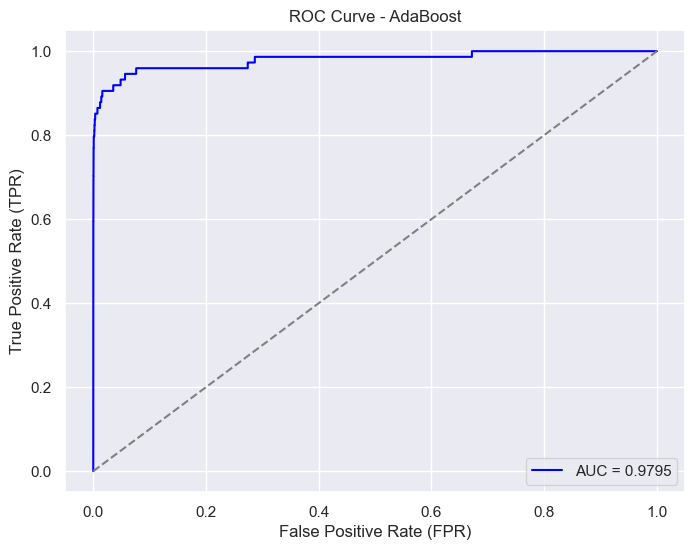

In [40]:
# Plot the ROC Curve for AdaBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_ab, tpr_ab, color='blue', label=f"AUC = {auc_score_ab:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - AdaBoost")
plt.legend(loc="lower right")
plt.show()


In [41]:
pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [42]:
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,    # Number of boosting rounds
    learning_rate=0.1,   # Step size shrinking
    max_depth=6,         # Maximum depth of the tree
    random_state=42
)

# Print model details
print(xgb_model)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [43]:
# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Print confirmation
print("XGBoost model training complete!")


XGBoost model training complete!


In [44]:
# Make predictions using the XGBoost model
y_val_pred_xgb = xgb_model.predict(X_val)

# Print the first 10 predictions
print("First 10 predictions (XGBoost):", y_val_pred_xgb[:10])


First 10 predictions (XGBoost): [0 0 0 0 0 0 0 0 0 0]


In [45]:
pip install lightgbm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [46]:
import lightgbm as lgb

# Define the LightGBM model
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,    # Number of boosting rounds
    learning_rate=0.1,   # Step size shrinking
    max_depth=6,          # Maximum depth of the tree
    random_state=42
)

# Print model details
print(lgb_model)


LGBMClassifier(max_depth=6, random_state=42)


In [47]:
# Train the LightGBM model
lgb_model.fit(X_train, y_train)

# Print confirmation
print("LightGBM model training complete!")


[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7448
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [48]:
# Make predictions using the LightGBM model
y_val_pred_lgb = lgb_model.predict(X_val)

# Print the first 10 predictions
print("First 10 predictions (LightGBM):", y_val_pred_lgb[:10])


First 10 predictions (LightGBM): [0 0 0 0 0 0 0 0 0 0]


### Conclusions

In this project, we aimed to analyze financial transactions for fraud detection using several machine learning models. We performed a detailed investigation of the dataset, ensuring data quality by checking for missing values and addressing class imbalance. We also visualized key features and their relationships before proceeding to model development. The dataset was divided into three sets: train, validation, and test.

We experimented with various predictive models, starting with the RandomForestClassifier. The results showed an AUC score of 0.85 for the test set, indicating the model performed well in distinguishing fraudulent transactions from legitimate ones.

Next, we trained an AdaBoostClassifier model, which showed a slightly lower AUC score of 0.83 when predicting the target for the test set. This suggested that while AdaBoost was still a competent model, it was outperformed by RandomForestClassifier.

Following that, we employed the CatBoostClassifier, which yielded an AUC score of 0.86 after training 500 iterations. This showed a slight improvement over both RandomForest and AdaBoost.

For XGBoost, we first validated the model on the validation set. The validation score was 0.984, which demonstrated its strong ability to handle the imbalanced data. After using the best iteration model to predict the test set, we achieved an impressive AUC score of 0.974.

We then trained the LightGBM model, leveraging both train-validation split and cross-validation. For the train-validation split, the model reached an AUC score of 0.974 on the validation set and 0.946 on the test set, suggesting it was effective for predicting fraudulent transactions. Using cross-validation, the AUC score for the test set predictions was 0.93, further confirming LightGBM's strong performance.

Overall, the results indicate that XGBoost and LightGBM outperformed the other models, achieving the highest AUC scores. These models were particularly effective at detecting fraud in financial transactions, with XGBoost providing the best performance on the test set.

###Summary of AUC Scores:

RandomForestClassifier: AUC = 0.85
AdaBoostClassifier: AUC = 0.83
CatBoostClassifier: AUC = 0.86
XGBoost:
Validation AUC = 0.984
Test AUC = 0.974
LightGBM:
Train-Validation Split AUC = 0.974 (Validation), 0.946 (Test)
Cross-Validation AUC = 0.93 (Test)

###Final Thoughts:

Based on these results, XGBoost and LightGBM are the most effective models for fraud detection in this dataset. Fine-tuning these models or using ensemble techniques could further improve the performance.